In [18]:
import numpy as np
import os
from osgeo import gdal
import matplotlib.pyplot as plt
import tifffile
from collections import defaultdict

In [19]:
raster_img_path=r"F:\mgr_datasets\multimoj\training_chips\chip_001_10_merged.tif"
mask_path=r"F:\mgr_datasets\multimoj\training_chips\chip_001_10.mask.tif"
num_class=13

In [20]:
dataset = gdal.Open(raster_img_path)
mask=tifffile.imread(mask_path)

In [21]:
# Pobranie liczby warstw obrazu
num_layers = dataset.RasterCount

# Przekształcenie obrazu do postaci tablicy numpy
image_data = np.zeros((dataset.RasterYSize, dataset.RasterXSize, num_layers), dtype=np.float32)
for i in range(num_layers):
    band = dataset.GetRasterBand(i + 1)
    image_data[:, :, i] = band.ReadAsArray()

In [22]:
width_mask, height_mask=mask.shape

In [23]:
# class_pixels=[[[]]]
# for width in range(width_mask):
#     for height in range(height_mask):
#         for class_n in range(num_class+1):
#             if(mask[width,height,0]==class_n):
#                 class_pixels[class_n,0].append(image_data[width,height,0])
#                 class_pixels[class_n,1].append(image_data[width,height,1])
#                 class_pixels[class_n,2].append(image_data[width,height,2])
#                 class_pixels[class_n,3].append(image_data[width,height,3])
#                 class_pixels[class_n,4].append(image_data[width,height,4])
#                 class_pixels[class_n,5].append(image_data[width,height,5])
        


In [24]:
num_channels=6

class_pixels = defaultdict(lambda: defaultdict(list))

for class_n in range(num_class+1):  # Iterujemy przez wszystkie klasy
    # Jeśli klasa nie występuje w obrazie, dodajemy pusty wektor dla tej klasy
    if class_n not in mask:
        class_pixels[class_n] = {channel: [] for channel in range(num_channels)}
        continue

    # Dla każdego piksela w obrazie
    for width in range(width_mask):
        for height in range(height_mask):
            if mask[width, height] == class_n:
                # Jeśli klasa występuje w obrazie, dodajemy piksel do odpowiedniego kanału
                for channel in range(num_channels):
                    pixel_value = image_data[width, height, channel]
                    class_pixels[class_n][channel].append(pixel_value)

In [25]:
num_classes = len(class_pixels.keys())
print("Liczba klas w class_pixels:", num_classes)

Liczba klas w class_pixels: 14


In [26]:
for class_n, channels_data in class_pixels.items():
    print(f"Class: {class_n}")
    for channel, pixels in channels_data.items():
        print(f"  Channel: {channel}")
        print("    Pixels:", pixels)


Class: 0
  Channel: 0
    Pixels: [-0.35361314, -0.3091649, -0.2628123, -0.2949197, -0.2882455, -0.32729825, -0.34486204, -0.35140324, -0.3516189, -0.3419067, -0.31942263, -0.29908475, -0.29065457, -0.28910106, -0.29329845, -0.30318928, -0.30643556, -0.2980849, -0.29317757, -0.29747045, -0.29757854, -0.2984557, -0.3112133, -0.31492695, -0.2967467, -0.28138575, -0.39389226, -0.3994841, -0.4032258, -0.39902213, -0.4062651, -0.42254466, -0.4294867, -0.43180802, -0.4387525, -0.4442813, -0.33660692, -0.29173338, -0.24385284, -0.27467224, -0.28822508, -0.32920977, -0.34461406, -0.3492029, -0.35019618, -0.34331128, -0.32355317, -0.30580404, -0.30014303, -0.30074888, -0.30377597, -0.30869415, -0.30699342, -0.29848823, -0.29889044, -0.306023, -0.29668322, -0.2797514, -0.27892843, -0.2794491, -0.2657107, -0.25586998, -0.39651507, -0.40045598, -0.407295, -0.4032508, -0.40817156, -0.42186418, -0.4292392, -0.4323969, -0.43746397, -0.4411054, -0.2980202, -0.25459927, -0.21051547, -0.24745564, -0.286

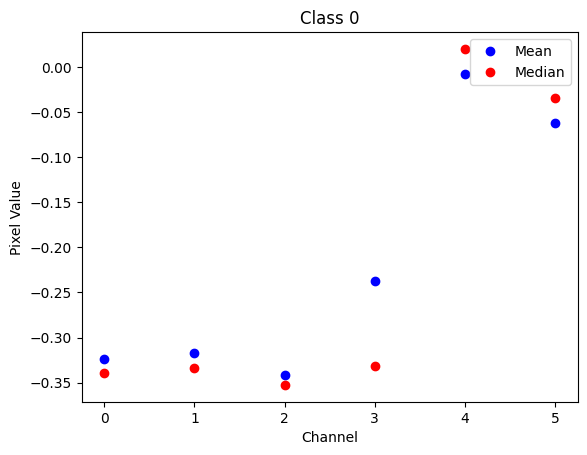

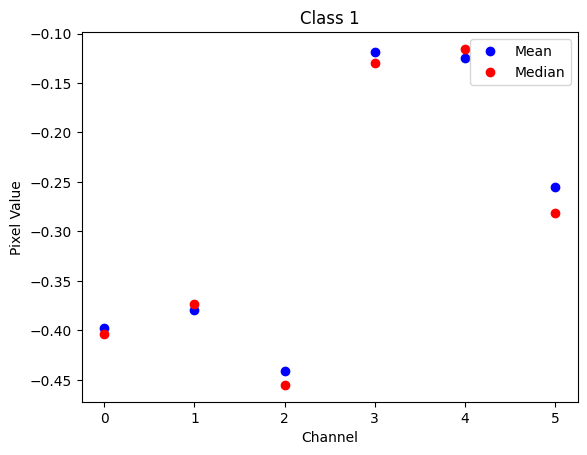

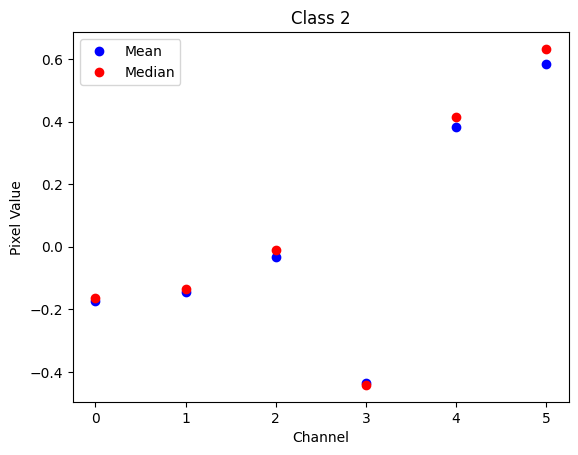

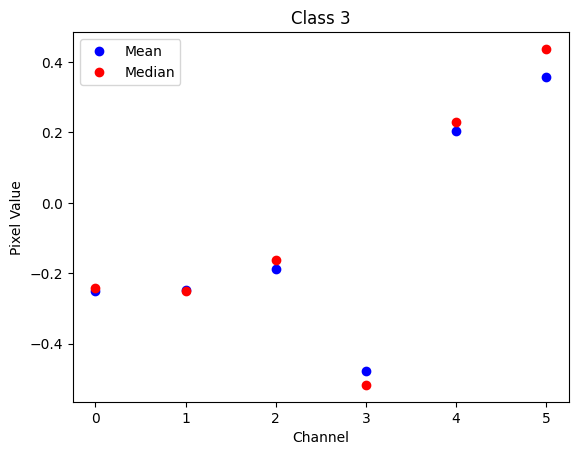

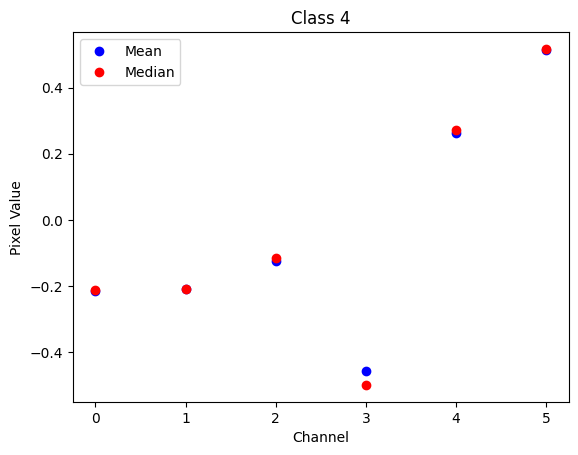

c:\Users\wojtek\.conda\envs\gdal2\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\Users\wojtek\.conda\envs\gdal2\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


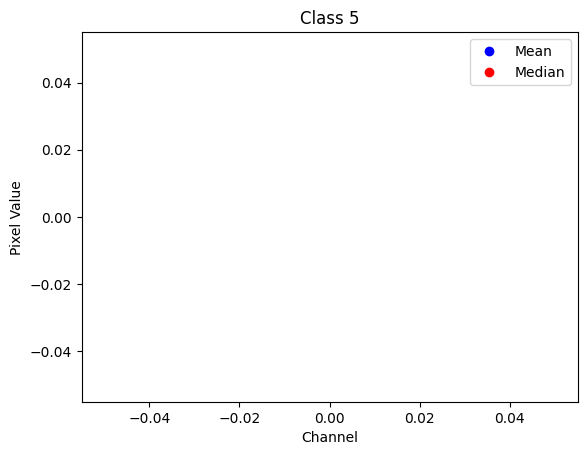

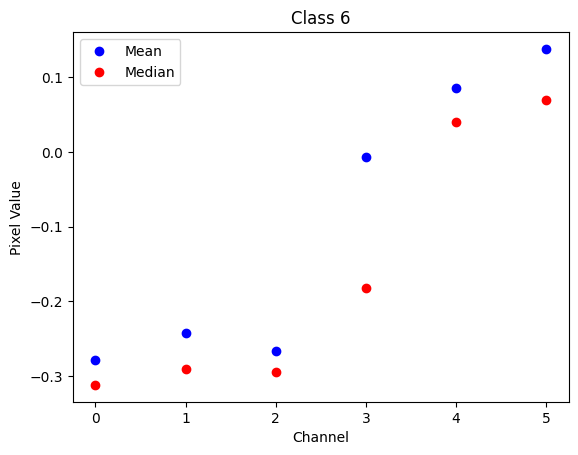

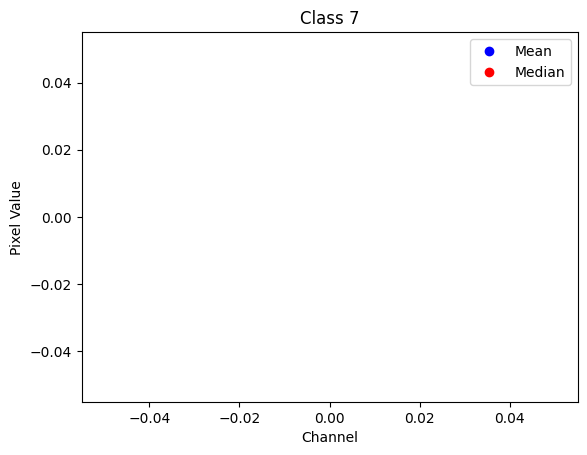

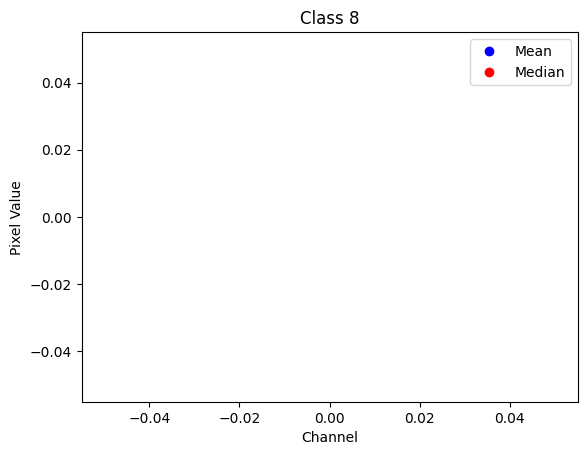

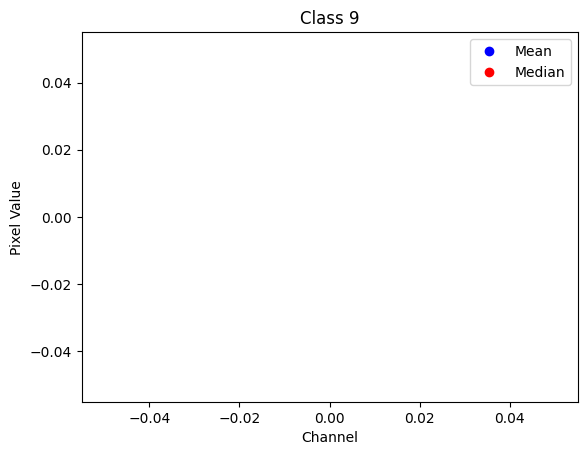

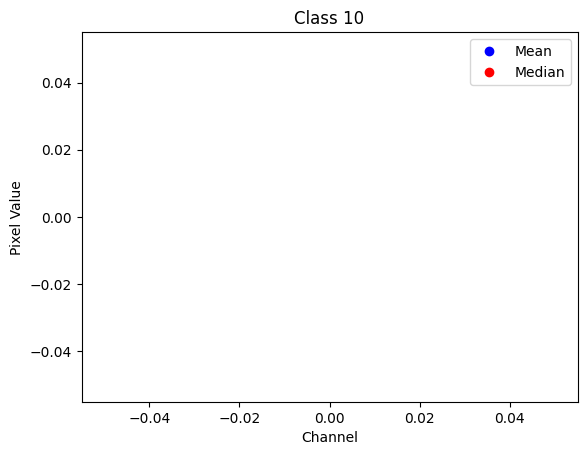

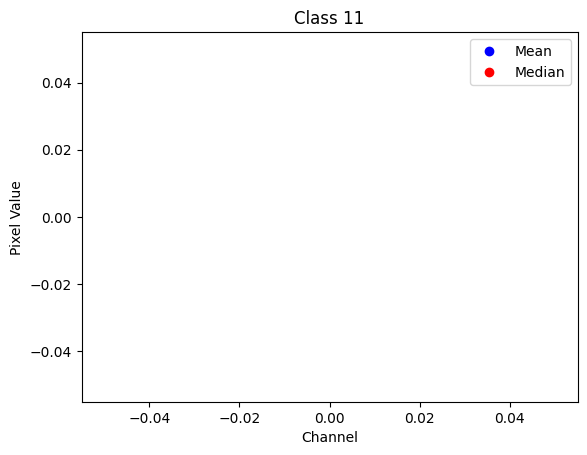

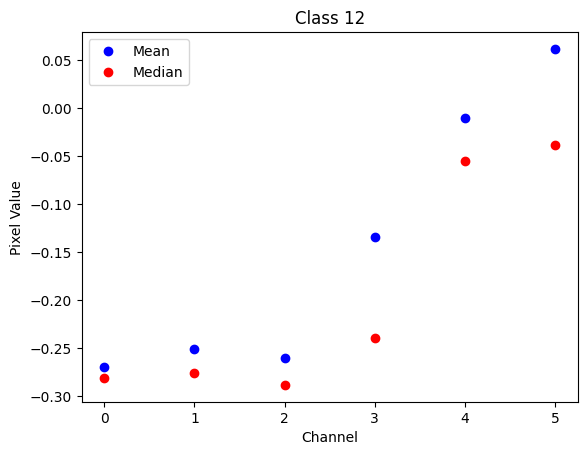

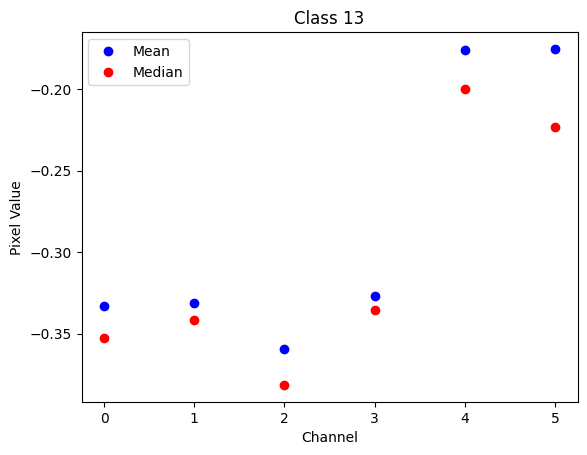

In [27]:
for class_n, channels_data in class_pixels.items():
    # Tworzymy wykres
    plt.figure()
    plt.title(f"Class {class_n}")

    # Dla każdego kanału
    for channel, pixels in channels_data.items():
        # Obliczamy średnią i medianę
        mean_value = np.mean(pixels)
        median_value = np.median(pixels)
        

        # Wykres średniej wartości dla każdego kanału
        plt.plot(channel, mean_value, 'bo')
        # Wykres mediany dla każdego kanału
        plt.plot(channel, median_value, 'ro')

    # Etykiety oznaczające medianę i średnią wartość
    plt.plot([], [], 'bo', label='Mean')
    plt.plot([], [], 'ro', label='Median')

    # Ustawienia osi i legendy
    plt.xlabel('Channel')
    plt.ylabel('Pixel Value')
    plt.legend()

    # Pokaż wykres
    plt.show()